<a href="https://colab.research.google.com/github/SummerLife/EmbeddedSystem/blob/master/MachineLearning/gist/mobilenet_model_fine_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building A Fine-Tuned MobileNet Model

In [2]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

1.15.2


In [28]:
keras.__version__

'2.2.4-tf'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [5]:
base_path = "/content/drive/My Drive/train_data"
train_path = base_path + '/train'
valid_path = base_path + '/valid'
test_path  = base_path + '/test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
mobile = tf.keras.applications.mobilenet.MobileNet()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step


In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [9]:
# grab the output from the sixth to last layer of the model
x = mobile.layers[-6].output

In [10]:
print(x)

Tensor("global_average_pooling2d/Mean:0", shape=(?, 1024), dtype=float32)


In [11]:
output = Dense(units=2, activation='softmax')(x)

In [12]:
model = Model(inputs=mobile.input, outputs=output)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

Here, we are freezing the weights of all the layers except for the last five layers in our new model, meaning that only the last five layers of the model will be trained.

In [14]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

## Train MobileNet Using Transfer Learning

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
Epoch 1/10
100/100 - 507s - loss: 0.2179 - acc: 0.9050 - val_loss: 0.4694 - val_acc: 0.8000
Epoch 2/10
Epoch 1/10
100/100 - 6s - loss: 0.1196 - acc: 0.9500 - val_loss: 0.2116 - val_acc: 0.9200
Epoch 3/10
Epoch 1/10
100/100 - 5s - loss: 0.0699 - acc: 0.9760 - val_loss: 0.0476 - val_acc: 0.9850
Epoch 4/10
Epoch 1/10
100/100 - 6s - loss: 0.0447 - acc: 0.9880 - val_loss: 0.0628 - val_acc: 0.9800
Epoch 5/10
Epoch 1/10
100/100 - 6s - loss: 0.0698 - acc: 0.9720 - val_loss: 0.0215 - val_acc: 0.9900
Epoch 6/10
Epoch 1/10
100/100 - 5s - loss: 0.0593 - acc: 0.9740 - val_loss: 0.0348 - val_acc: 0.9900
Epoch 7/10
Epoch 1/10
100/100 - 5s - loss: 0.0370 - acc: 0.9870 - val_loss: 0.0242 - val_acc: 0.9900
Epoch 8/10
Epoch 1/10
100/100 - 5s - loss: 0.0353 - acc: 0.9860 - val_loss: 0.0877 - val_acc: 0.9700
Epoch 9/10
Epoch 1/10
100/100 - 5s - loss: 0.0352 - acc: 0.9850 - val_loss: 0.0248 - val_acc: 0.9900
Epoch 10/10
Epoch 1/10
100/100 - 5s - loss: 0.0180 - acc: 0.9960 - val_loss: 0.0370 - val

In [18]:
test_labels = test_batches.classes
print(len(test_labels))
print(test_labels)

100
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
print(test_batches.class_indices)

{'cat': 0, 'dog': 1}


In [20]:
predictions = model.predict(x=test_batches, verbose=0)
print(predictions)

[[9.05213594e-01 9.47864205e-02]
 [9.99997616e-01 2.37217432e-06]
 [9.99999523e-01 5.34329786e-07]
 [9.99995708e-01 4.23625670e-06]
 [9.99992847e-01 7.13192912e-06]
 [1.00000000e+00 1.86063893e-08]
 [9.99991536e-01 8.47329011e-06]
 [9.92587745e-01 7.41227716e-03]
 [9.99884605e-01 1.15345749e-04]
 [9.98884141e-01 1.11590163e-03]
 [1.00000000e+00 2.15284892e-08]
 [9.97905016e-01 2.09495146e-03]
 [2.08797213e-02 9.79120255e-01]
 [9.99992490e-01 7.49332185e-06]
 [9.99932170e-01 6.78052238e-05]
 [9.99998927e-01 1.02957279e-06]
 [9.99733865e-01 2.66104907e-04]
 [9.99616385e-01 3.83590261e-04]
 [9.89680111e-01 1.03198560e-02]
 [9.99998689e-01 1.36652704e-06]
 [9.99998212e-01 1.82212113e-06]
 [9.88425612e-01 1.15743997e-02]
 [9.99815285e-01 1.84790377e-04]
 [9.99995708e-01 4.27161604e-06]
 [9.99011993e-01 9.87934414e-04]
 [9.87981141e-01 1.20188277e-02]
 [9.99997735e-01 2.22898530e-06]
 [9.99999762e-01 2.92185860e-07]
 [9.99861598e-01 1.38384261e-04]
 [9.99948740e-01 5.12628831e-05]
 [9.999986

## Visualize Predictions In Confusion Matrix

In [21]:
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [23]:
print(predictions.argmax(axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
cm_plot_labels = ['cat','dog']

Confusion matrix, without normalization
[[49  1]
 [ 2 48]]


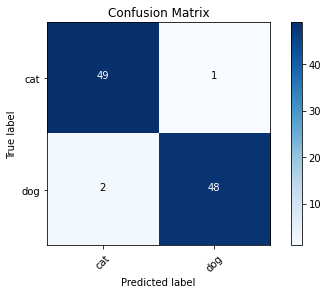

In [25]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## save the mode

In [26]:
model.save("mobile_new_predict_cat_and_dog.h5")